In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_set = np.array([1,2,3,4,5,6])

In [3]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [4]:
X = [x_set,f]

In [5]:
prob = np.array([ f(x_k)  for x_k in x_set])
prob

array([0.04761905, 0.0952381 , 0.14285714, 0.19047619, 0.23809524,
       0.28571429])

In [6]:
dict(zip(x_set,prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

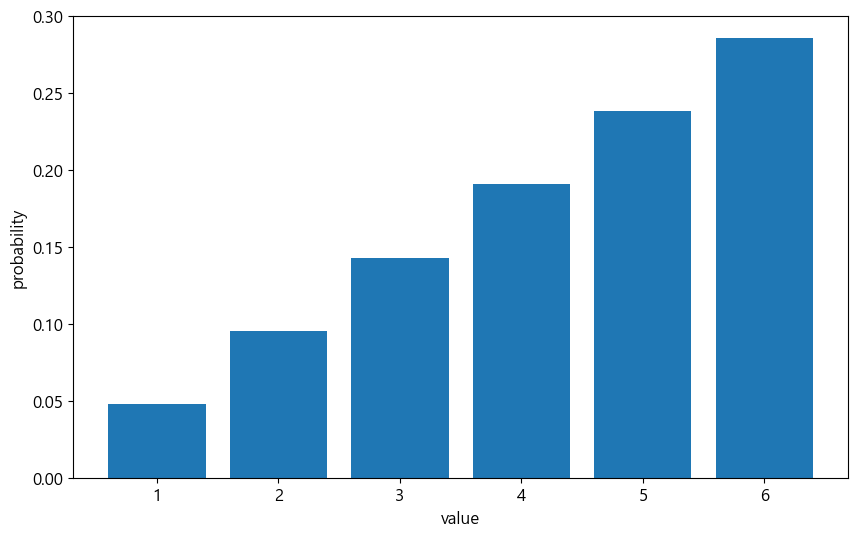

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')
plt.show()

In [8]:
np.all(prob >= 0)

True

In [9]:
np.sum(prob)

0.9999999999999999

In [10]:
def F(x):
    return np.sum([ f(x_k) for x_k in x_set if x_k <= x])

In [11]:
F(3)

0.2857142857142857

In [12]:
y_set = np.array([ 2*x_k+3  for x_k in x_set])
y_set

array([ 5,  7,  9, 11, 13, 15])

In [13]:
prob = np.array([ f(x_k)  for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [14]:
np.sum([ x_k * f(x_k)  for x_k in x_set])

4.333333333333333

In [15]:
sample = np.random.choice(x_set,1000000,p=prob)
np.mean(sample)

4.332859

In [16]:
def E(X,g=lambda x : x):
    x_set,f = X
    return np.sum([ g(x_k) * f(x_k)  for x_k in x_set])

In [17]:
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [18]:
E(X)

4.333333333333333

In [19]:
E(X,g=lambda x: 2*x+3)

11.666666666666664

In [20]:
2*E(X)+3

11.666666666666666

In [21]:
mean = E(X)
np.sum([ (x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [22]:
def V(X,g=lambda x: x):
    x_set,f = X
    mean = E(X,g)
    return np.sum([ (g(x_k)-mean)**2 * f(x_k)  for x_k in x_set])

In [23]:
V(X)

2.2222222222222223

In [24]:
V(X,lambda x: 2*x+3)

8.88888888888889

In [25]:
2**2*V(X)

8.88888888888889

In [26]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)
x_set,y_set

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([1, 2, 3, 4, 5, 6]))

In [27]:
def f_XY(x,y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y*(x-y)/441
    else:
        return 0

In [28]:
XY = [x_set,y_set,f_XY]

In [29]:
prob = np.array([[ f_XY(x_i,y_j) for y_j in y_set ] for x_i in x_set ])

In [30]:
1/441

0.0022675736961451248

In [31]:
prob

array([[0.00226757, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.00453515, 0.00453515, 0.        , 0.        , 0.        ,
        0.        ],
       [0.00680272, 0.00907029, 0.00680272, 0.        , 0.        ,
        0.        ],
       [0.00907029, 0.01360544, 0.01360544, 0.00907029, 0.        ,
        0.        ],
       [0.01133787, 0.01814059, 0.02040816, 0.01814059, 0.01133787,
        0.        ],
       [0.01360544, 0.02267574, 0.02721088, 0.02721088, 0.02267574,
        0.01360544],
       [0.        , 0.02721088, 0.03401361, 0.03628118, 0.03401361,
        0.02721088],
       [0.        , 0.        , 0.04081633, 0.04535147, 0.04535147,
        0.04081633],
       [0.        , 0.        , 0.        , 0.05442177, 0.05668934,
        0.05442177],
       [0.        , 0.        , 0.        , 0.        , 0.06802721,
        0.06802721],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.08163265]])

In [32]:
prob.shape

(11, 6)

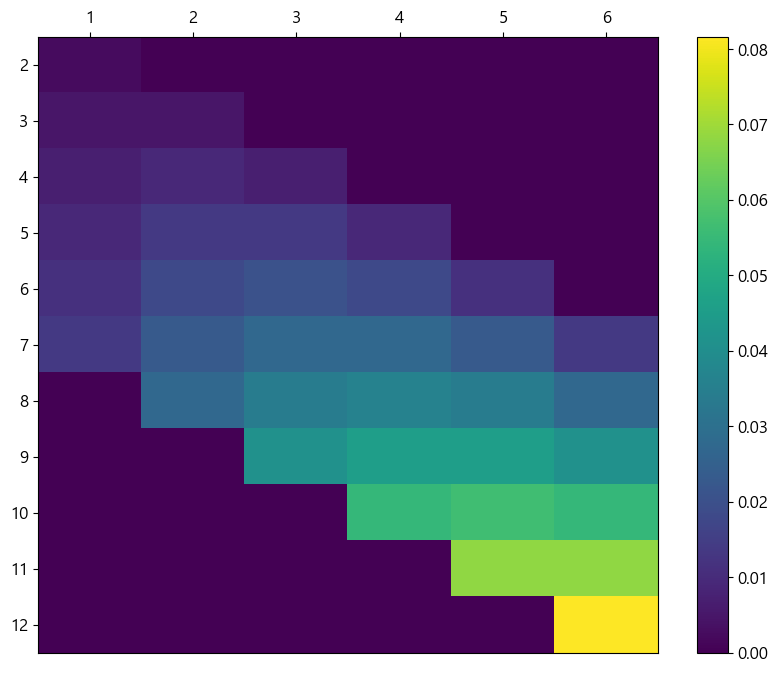

In [33]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5 , minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5 , minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show()

In [34]:
np.all(prob >= 0)

True

In [35]:
np.sum(prob)

1.0

In [36]:
def f_X(x):
    return np.sum([ f_XY(x,y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([ f_XY(x_k,y) for x_k in x_set])

In [37]:
X = [x_set, f_X]
y = [y_set, f_Y]

In [38]:
prob_x = np.array([ f_X(x_k)  for x_k in x_set])
prob_y = np.array([ f_Y(y_k)  for y_k in y_set])

In [39]:
prob_x

array([0.00226757, 0.00907029, 0.02267574, 0.04535147, 0.07936508,
       0.12698413, 0.15873016, 0.1723356 , 0.16553288, 0.13605442,
       0.08163265])

In [40]:
prob_y

array([0.04761905, 0.0952381 , 0.14285714, 0.19047619, 0.23809524,
       0.28571429])

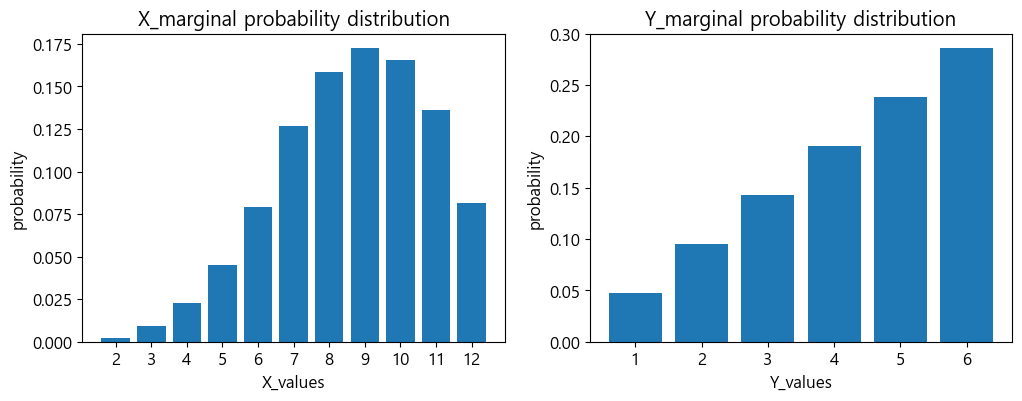

In [41]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_values')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_values')
ax2.set_ylabel('probability')
ax2.set_xticks(y_set)
plt.show()

In [42]:
np.sum([ x_i * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [43]:
def E(XY,g):
    x_set,y_set,f_XY = XY
    return np.sum([ g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [44]:
mean_X = E(XY,lambda x,y:x)

In [45]:
mean_Y = E(XY,lambda x,y:y)

In [46]:
mean_X,mean_Y

(8.666666666666666, 4.333333333333333)

In [47]:
a,b=2,3
E(XY,lambda x,y: a*x+b*y)

30.333333333333332

In [48]:
a*mean_X+b*mean_Y

30.333333333333332

In [49]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i,y_j)   for x_i in x_set for y_j in y_set])

4.444444444444444

In [50]:
def V(XY,g):
    x_set,y_set,f_XY = XY
    mean = E(XY,g)
    return np.sum([(g(x_i,y_j)- mean)**2 * f_XY(x_i,y_j)   for x_i in x_set for y_j in y_set])

In [51]:
var_X = V(XY,g=lambda x,y:x)
var_X

4.444444444444444

In [52]:
var_Y = V(XY,g=lambda x,y:y)
var_Y

2.2222222222222223

In [53]:
def Cov(XY):
    x_set,y_set,f_XY = XY
    mean_X = E(XY,lambda x,y:x)
    mean_Y = E(XY,lambda x,y:y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [54]:
cov_xy = Cov(XY)

In [55]:
cov_xy

2.222222222222222

In [56]:
a,b=2,3
V(XY,lambda x,y:a*x+b*y)

64.44444444444444

In [57]:
a**2 * var_X + b**2 * var_Y + 2*a*b*cov_xy

64.44444444444443

In [58]:
cov_xy/np.sqrt(var_X*var_Y)

0.7071067811865474